# Simulation algorithms

The aim of this tutorial is to implement some geostatistical algorithms.

In [3]:
import numpy as np
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt

np.random.seed(12345)

## 1. Cholesky algorithm

1) Write a function which computes the value of the exponential covariance for a set of distances **h**, the **sill** and the **scale** parameter.

In [4]:
def covariance_expo(h,sill=1,scale=1):
    return sill * np.exp(-h/scale)

2) Computation of the covariance matrix between points an a grid.

In [5]:
ndiscr =100
u = np.linspace(0,100,ndiscr)
v = np.linspace(0,100,ndiscr)

#Grid creation
coords = np.array([(i,j) for i in u for j in v])

#Distance matrix
dist = distance_matrix(coords,coords)

#Covariance matrix
covmat = covariance_expo(dist,scale=10)


3) Create and display a simulation of a GRF with mean 0 and the previous covariance matrix.

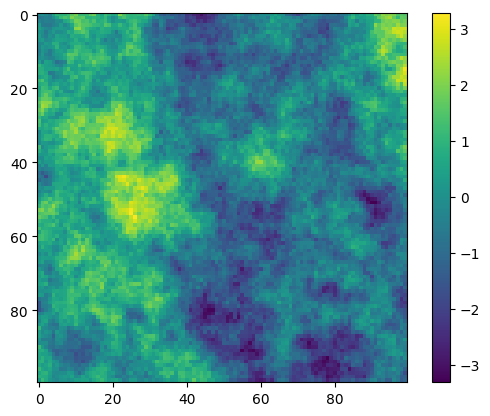

In [6]:
simu = np.linalg.cholesky(covmat) @ np.random.normal(size = covmat.shape[1])
plt.imshow(simu.reshape((len(u),len(v))))
a=plt.colorbar()

4) Relaunch by increasing **ndiscr**. Be careful...

5) Simulate 1000 random vectors $(Z(x),Z(y))$ with $||x-y||=1$. Display the scatter plot and the regression line.

In [7]:
coords = np.array(((0,0),(0,1)))
dist = distance_matrix(coords,coords)
covmat = covariance_expo(dist,scale=10)
result = ...
plt.scatter(result[0,:],result[1,:],s=1)
rho=...
plt.plot([-3,3],[-3*rho,3*rho])

TypeError: 'ellipsis' object is not subscriptable

## 2. Spectral method

###  Construction of a simulation function

1) First, we create a function that will return **n** random objects **omega** and **phi** (as in the slides) in the Gaussian covariance case, from the **scale** parameter and the space **dimension**.


In [29]:
def SpectrGaussObjects(n, scale, dimension=2):
    omega = np.random.normal(size = (n,dimension), loc = 0, scale = np.sqrt(2)/scale)
    phi = 2. * np.pi * np.random.uniform(size = n)
    return omega,phi

Call

In [64]:
omega,phi=SpectrGaussObjects(2,6)

In [65]:
coords.shape

(10000, 2)

2) Then, we create a function which will return the value of one band spread at (**coords**) locations from the random objects **phi** and **omega** (these objects can have been simulated with the previous function or with another one if you want to simulate another covariance function).

In [66]:
def SpectrBasic(coords,phi,omega):
    return np.sqrt(2) * np.cos(coords @ omega.T + phi)

In [67]:
SpectrBasic(coords,phi,omega).shape

(10000, 2)

3) Write the function which will return the final simulation at **coords** locations from the random objects **phi** and **omega** (as the previous one, these function can be used to simulate any covariance).

In [68]:
def SpectrFinal(coords,phi,omega):
    mat = SpectrBasic(coords,phi,omega)
    return 1./np.sqrt(mat.shape[1]) * np.sum(mat,axis=1) 

Display

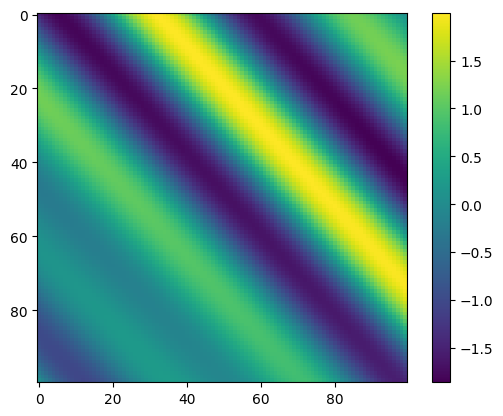

In [69]:
plt.imshow(SpectrFinal(coords,phi,omega).reshape(len(u),len(v)))
plt.colorbar()

## With gstlearn

### Non conditional simulation

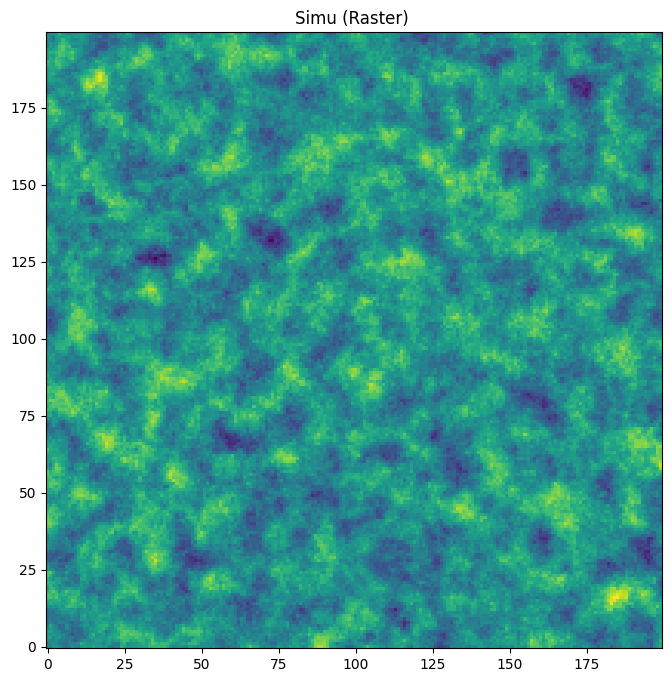

In [18]:
import gstlearn as gl
import gstlearn.plot as gp

grid = gl.DbGrid.create([200,200])
model = gl.Model.createFromParam(gl.ECov.SPHERICAL,range=10)
gl.simtub(None,grid,model,nbtuba=1000)
gp.plot(grid)

For conditional simulations with a data set stored in a **Db** named **dat**, a kriging will be performed. So, you have to define a **Neigh** object and use for instance: